In [1]:
#import kütüphane
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("kidney_disease.csv") #Veriseti yükleme
df.drop("id",axis=1,inplace=True) #id sütununu sildim
#datanın sütun isimlerini anlayacağımız şekilde değiştirelim
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',

              'red_blood_cells', 'pus_cell', 'pus_cell_clumbs', 'bacteria',

              'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin',

              'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus',

              'coronary_artery_disease', 'appetite', 'peda_edema', 'anemia', 'class']



# Geçici olarak tüm satır ve sütunları göster
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumbs,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
df.info() #veriyi tarama
#data dosyası hakkında bilgi öğrenmek için.
#1.Kaç tane verim var bunu öğreniyorum
#2.Column isimlerinde büyük küçük, boşluk, ingilizce olmayan karakterleri kontrol ediyorum.
#3.Kaç adet Null değer var kontrol ediyorum.
#Columns ve Dtypes karşılaştırma problemleri var mı kontrol ediyorum.
#24 tahmin yapamak için kullanacağımız özellikler var
#toplam 400 veri var
#11 tane numerik 14 tane string var
#eksik veriler var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumbs          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [4]:
describe=df.describe()
describe
#describe numerik değerlerin temel istatistik özellikleri analiz edilir
#count = veri sayısı
#mean = ortalama değeri
#std = standart sapma
#min = verilerin en düşük değeri
#25 = ilk çeyrekteki medyan(ortanca) değeri
#50 = tüm verideki medyan(ortanca) değeri
#75 = son çeyrekteki medyan(ortanca) değeri
#max = verilerin en yüksek değeri

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:
#kategorik olan verileri numeriğe çevirme
#errors=coerce "100"->100 dışında "asd" gibi çeviremediği değerleri boş veriye çeviriyor
df["packed_cell_volume"]=pd.to_numeric(df["packed_cell_volume"],errors="coerce")
df["white_blood_cell_count"]=pd.to_numeric(df["white_blood_cell_count"],errors="coerce")
df["red_blood_cell_count"]=pd.to_numeric(df["red_blood_cell_count"],errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumbs          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [6]:
#EDA #kategorik ve numerik olarak 2 ye ayırma işlemi
cat_cols=[col for col in df.columns if df[col].dtype=="object"] #kategorik ise
num_cols=[col for col in df.columns if df[col].dtype!="object"] #numerik ise
#kaçar adet uniq value var 
for col in cat_cols:
    print(f"{col}:{df[col].unique()}")

#hatalar olduğunu gördük bu hataları düzelteceğiz

red_blood_cells:[nan 'normal' 'abnormal']
pus_cell:['normal' 'abnormal' nan]
pus_cell_clumbs:['notpresent' 'present' nan]
bacteria:['notpresent' 'present' nan]
hypertension:['yes' 'no' nan]
diabetes_mellitus:['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease:['no' 'yes' '\tno' nan]
appetite:['good' 'poor' nan]
peda_edema:['no' 'yes' nan]
anemia:['no' 'yes' nan]
class:['ckd' 'ckd\t' 'notckd']


In [7]:
# 'diabetes_mellitus' sütunundaki değerleri değiştirme
df["diabetes_mellitus"].replace(to_replace={'\tno': "no",'\tyes': "yes", ' yes': "yes"}, inplace=True)

# 'coronary_artery_disease' sütunundaki değerleri değiştirme
df["coronary_artery_disease"].replace(to_replace={'\tno': "no"}, inplace=True)

# 'class' sütunundaki değerleri değiştirme
df["class"].replace(to_replace={'ckd\t': "ckd"}, inplace=True)

In [8]:
#yaptığımız değiştirme olmuş mu diye tekrar kontrol ediyoruz
for col in cat_cols:
    print(f"{col}:{df[col].unique()}")

red_blood_cells:[nan 'normal' 'abnormal']
pus_cell:['normal' 'abnormal' nan]
pus_cell_clumbs:['notpresent' 'present' nan]
bacteria:['notpresent' 'present' nan]
hypertension:['yes' 'no' nan]
diabetes_mellitus:['yes' 'no' nan]
coronary_artery_disease:['no' 'yes' nan]
appetite:['good' 'poor' nan]
peda_edema:['no' 'yes' nan]
anemia:['no' 'yes' nan]
class:['ckd' 'notckd']


In [9]:
df["class"]=df["class"].map({"ckd":0,"notckd":1})#mapping işlemi
#class etiketindeki çıktıları 0 ve 1 olarak değiştirdik 

In [10]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumbs,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,1


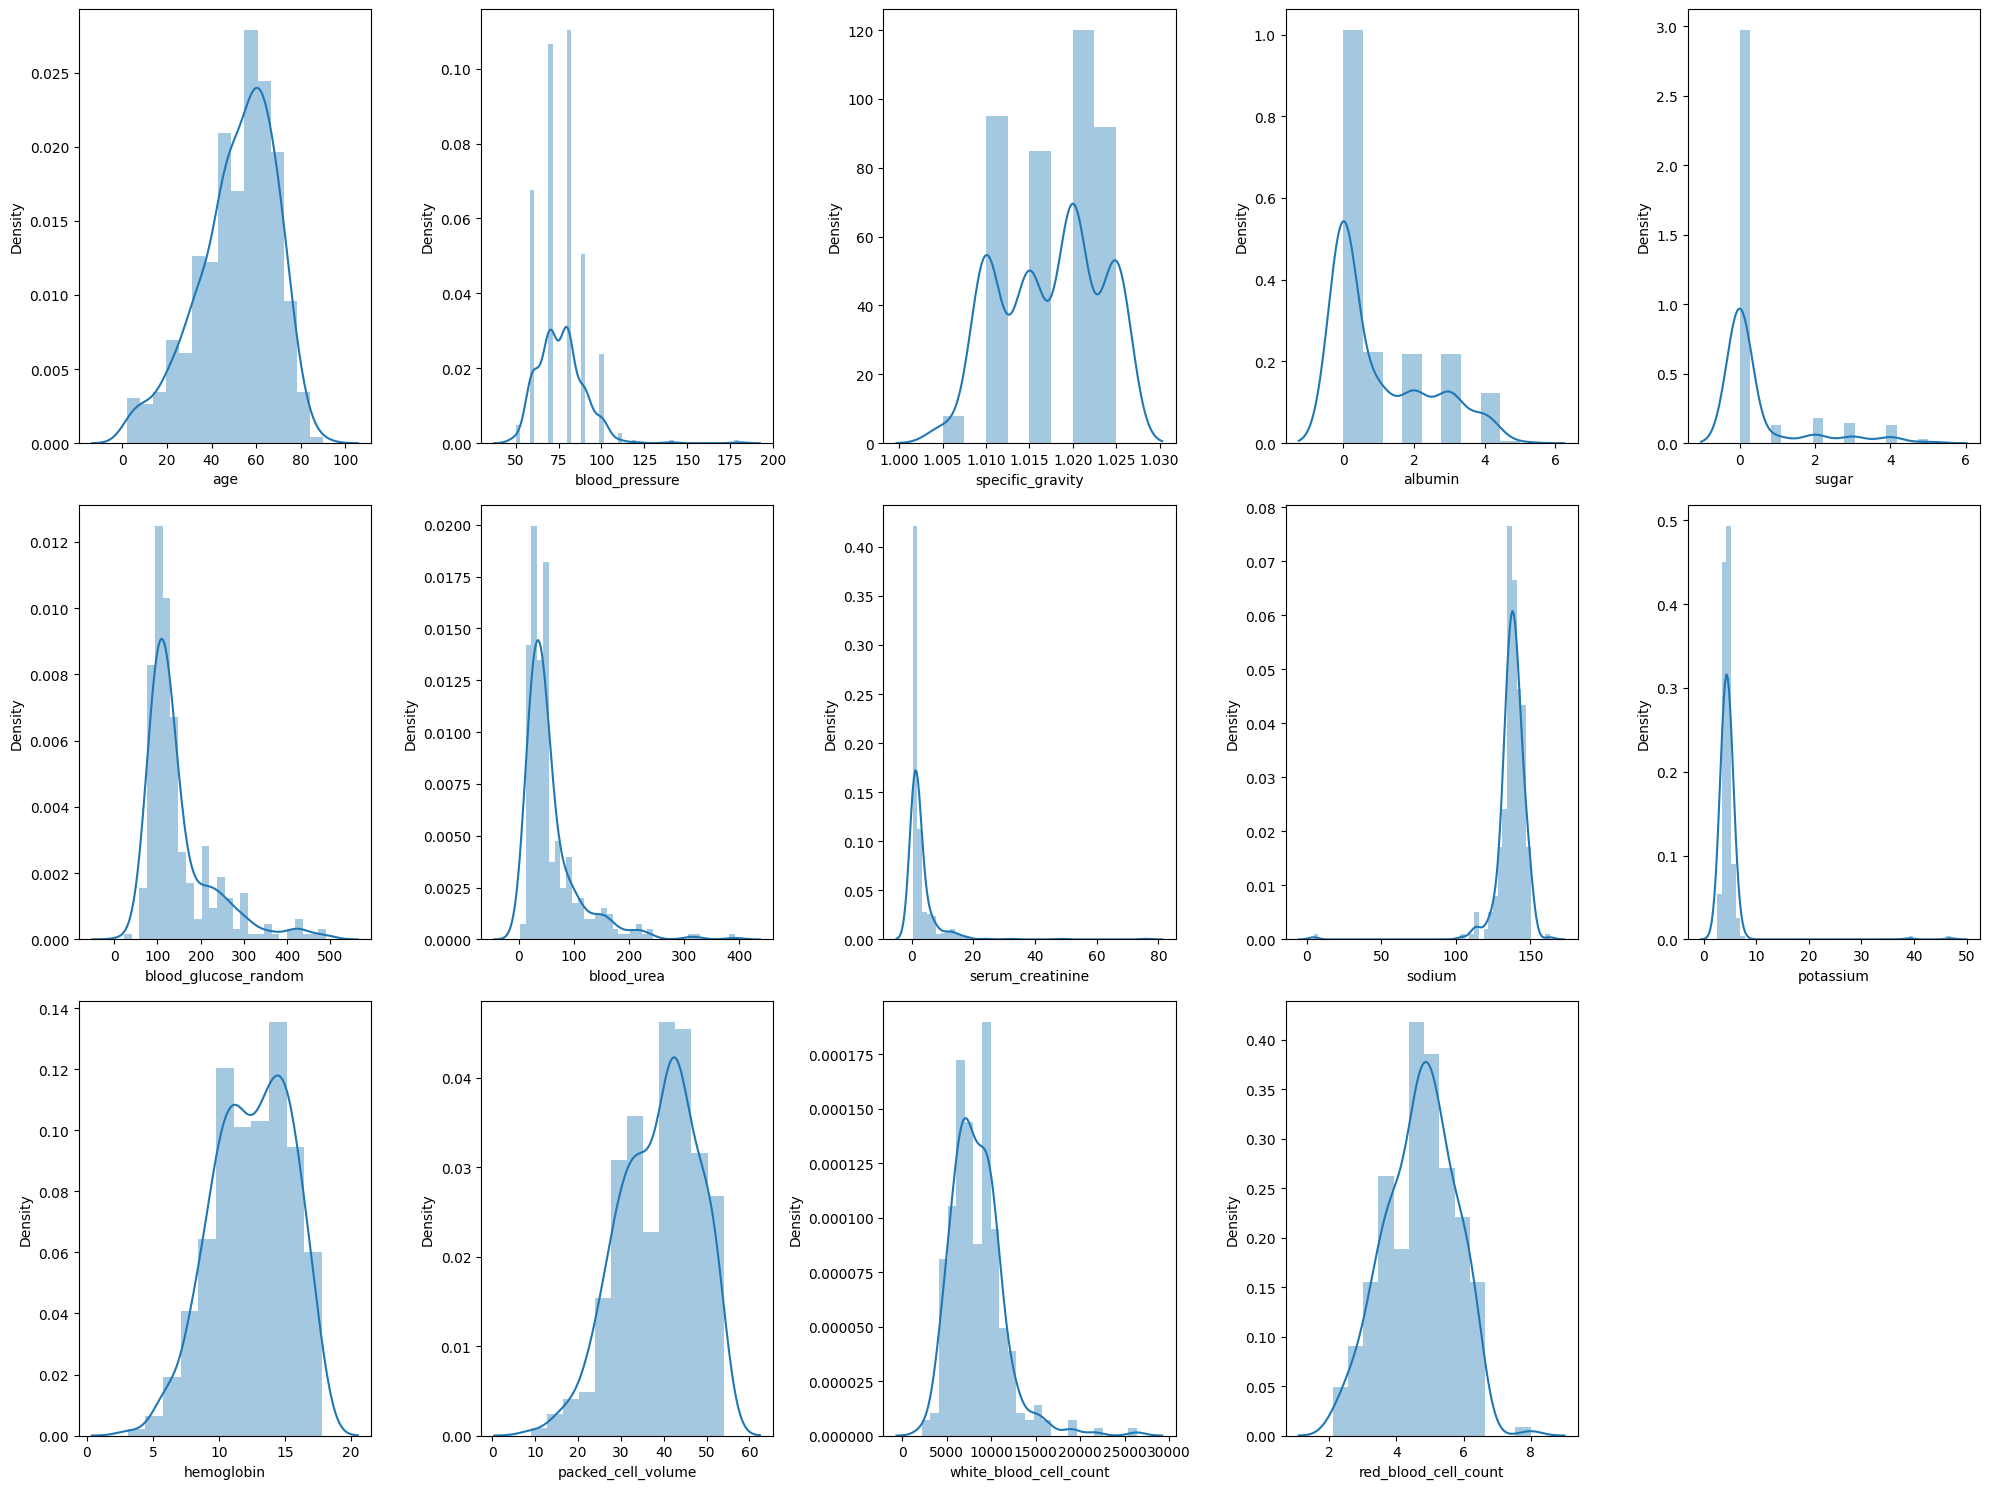

In [11]:
# Numerik değerlerin analizi
plt.figure(figsize=(20,15))  # Grafik boyutunu ayarlama
plotnumber = 1

for col in num_cols:
    if plotnumber <= 14:  # 14'e kadar olan sütunları göster
        ax = plt.subplot(3, 5, plotnumber)  # 3 satır, 5 sütun
        sns.distplot(df[col], kde=True)  # Histogram ve KDE'yi aynı anda göster
        plt.xlabel(col)
    plotnumber += 1

plt.tight_layout()  # Alt grafiklerin düzenini ayarlama
plt.show()  # Grafiği göster

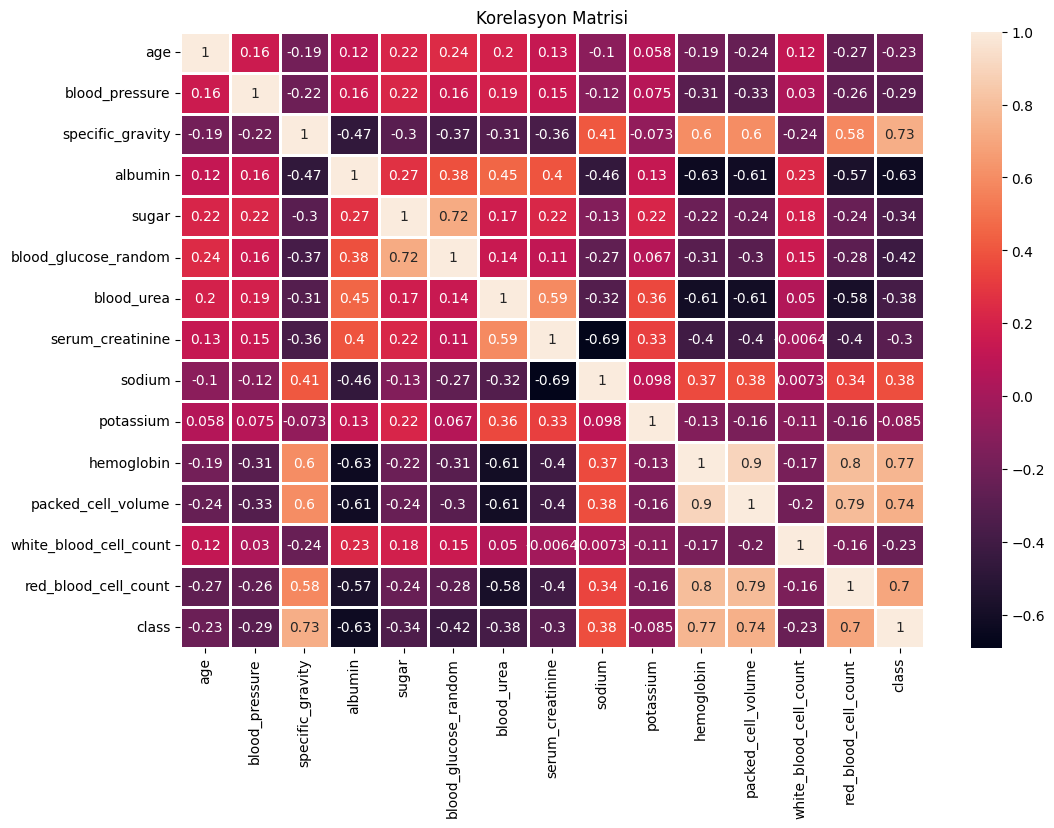

In [12]:
# Sadece sayısal sütunları seçme
correlation_matrix = df.select_dtypes(include=[float, int]).corr()

plt.figure(figsize=(12, 8))  # Grafik boyutunu ayarlama

sns.heatmap(correlation_matrix, annot=True, linecolor="white", linewidths=2)

plt.title('Korelasyon Matrisi')

plt.show()
#class ile en yüksek kolerasyona sahip değerler (red_blood_cell_count,packed_cell_volume,hemoglobin,specific_gravity))

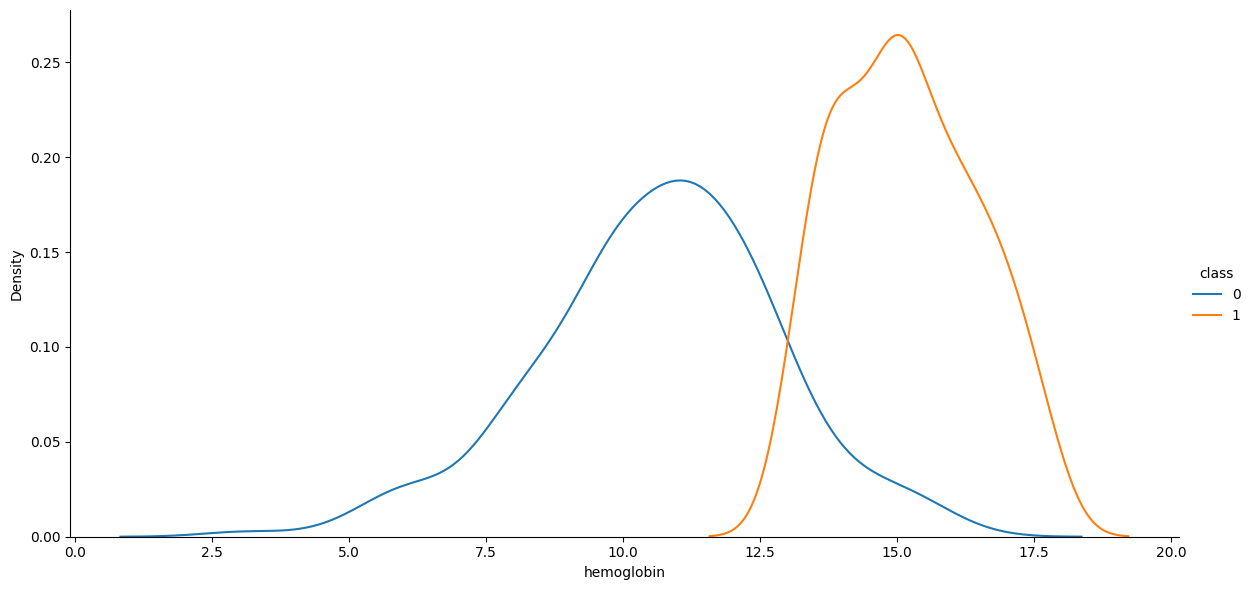

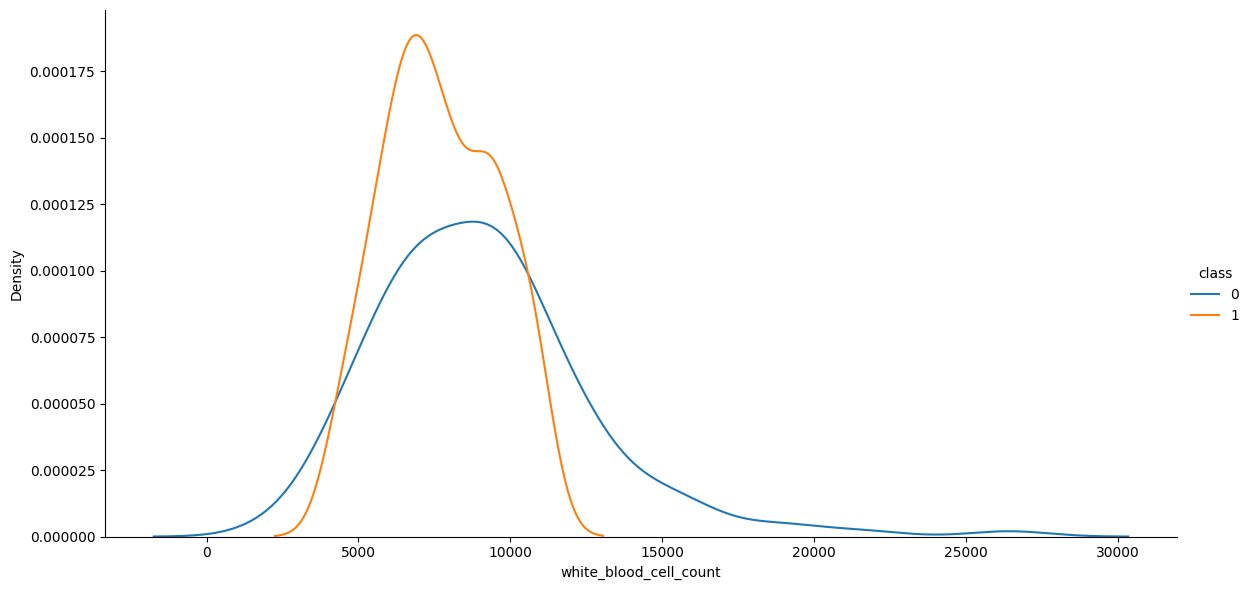

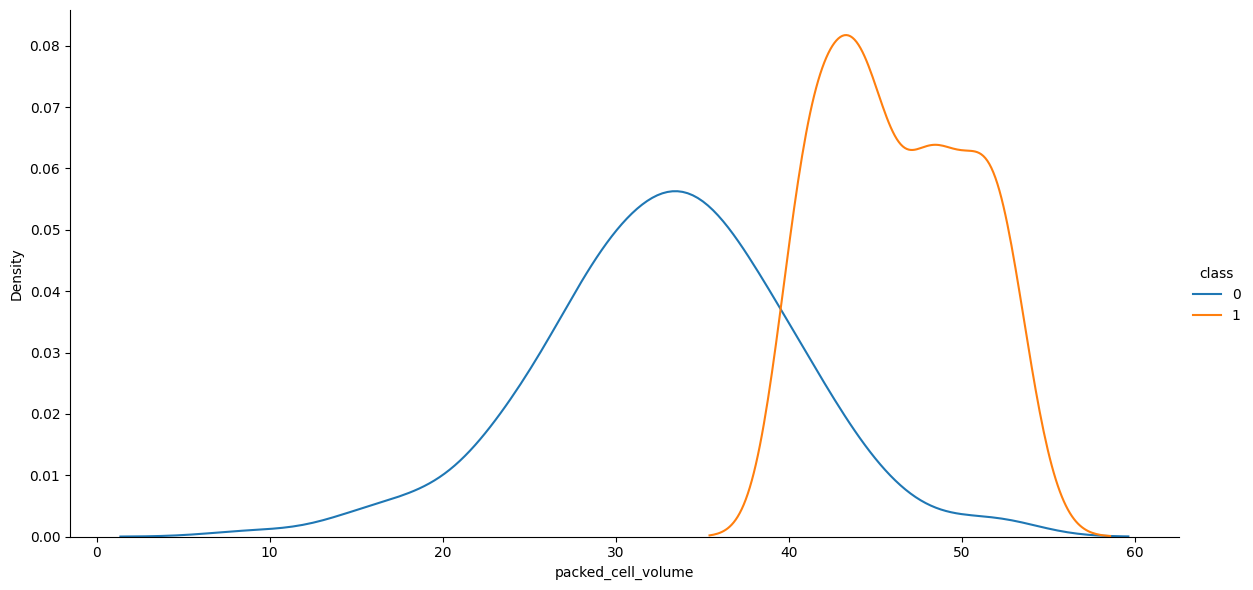

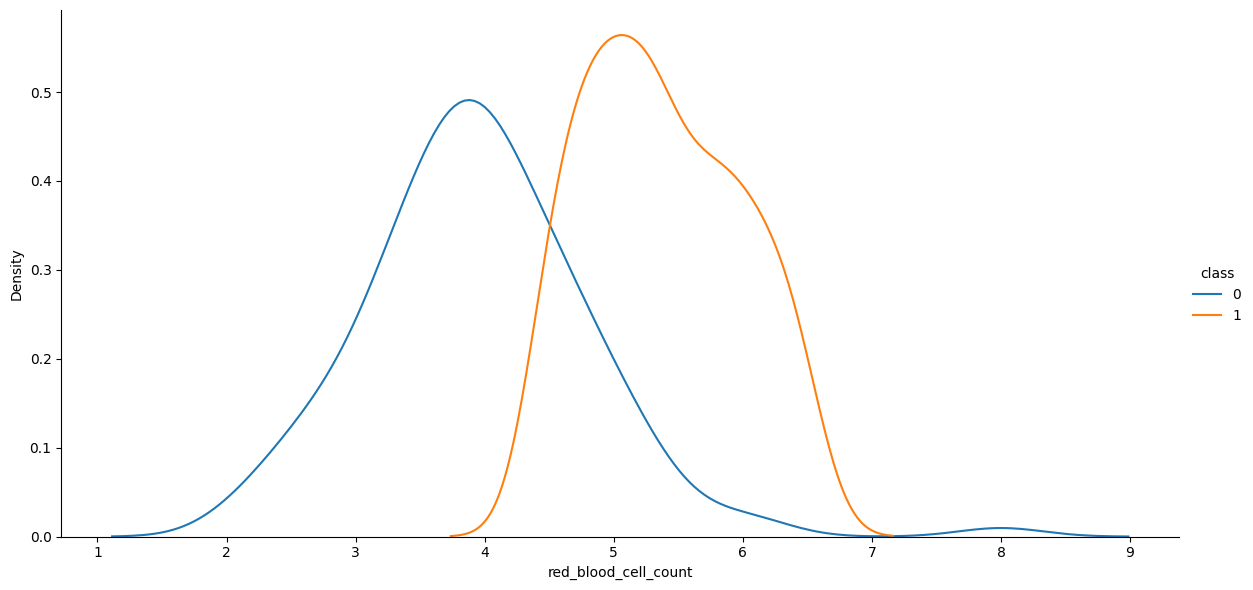

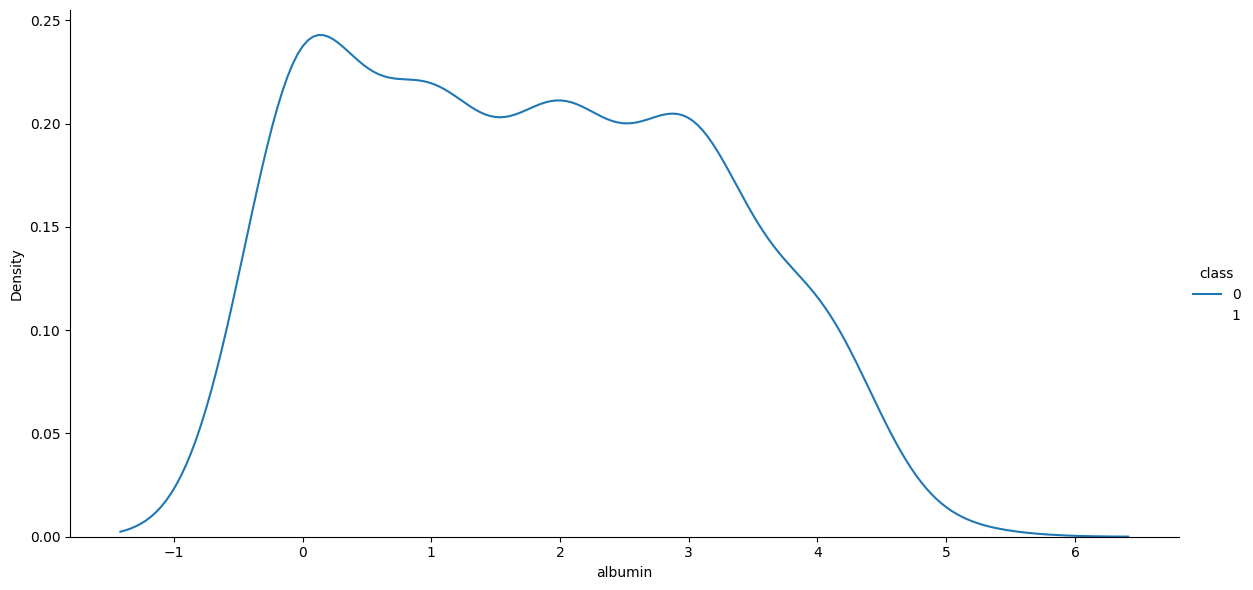

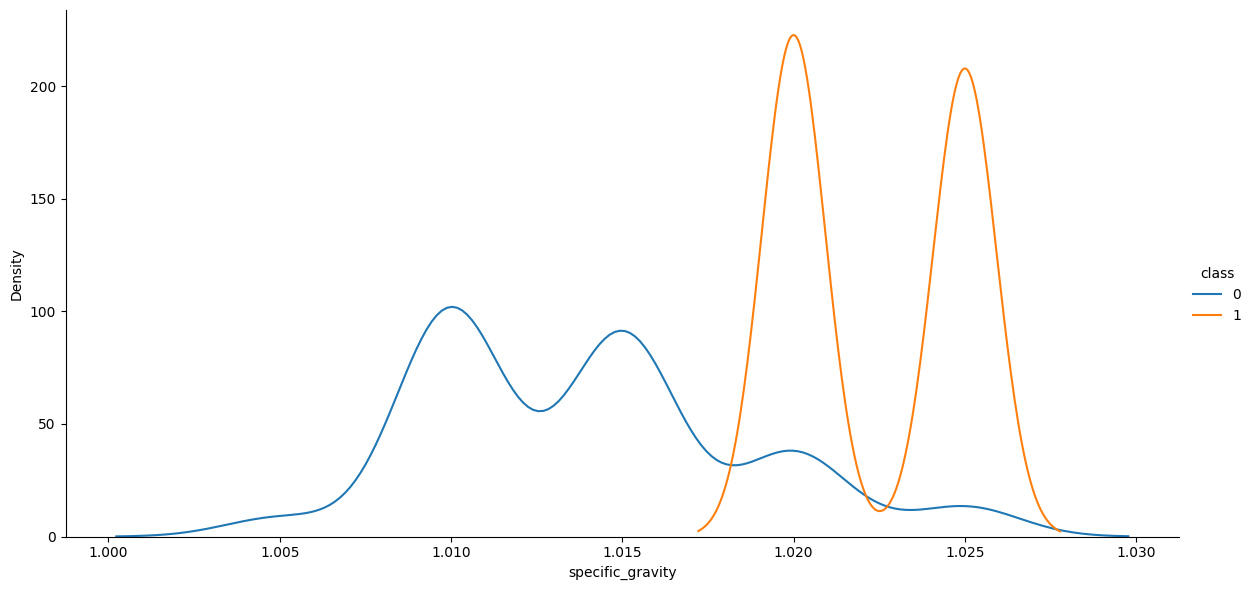

In [13]:
def kde(col):  #verileri yorumlama
    grid=sns.FacetGrid(df,hue="class",height=6,aspect=2)
    grid.map(sns.kdeplot,col)
    grid.add_legend()
kde("hemoglobin")
kde("white_blood_cell_count")
kde("packed_cell_volume")
kde("red_blood_cell_count")
kde("albumin")
kde("specific_gravity")

In [14]:
#kayıp veri problemi çözme
df.isna().sum().sort_values(ascending=False)#kaç adet kayıp veri var 

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
hemoglobin                  52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumbs              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
class                        0
dtype: int64

In [15]:
def  solve_mv_random_value(feature):#numerik değerler 
    random_sample=df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature]=random_sample
for col in num_cols:
    solve_mv_random_value(col)#boş veri var mı kontrol etme
df[num_cols].isnull().sum()#class bazlı yapmaya bak

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [16]:
def solve_mv_mode(feature):#kategorik değerler
    mode=df[feature].mode()[0]
    df[feature]=df[feature].fillna(mode)
solve_mv_random_value("red_blood_cells")
solve_mv_random_value("pus_cell")
for col in cat_cols:
    solve_mv_mode(col)
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumbs            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
anemia                     0
class                      0
dtype: int64

In [17]:
#preprocessing
for col in cat_cols:
    print(f"{col}:{df[col].nunique()}")
encoder=LabelEncoder()
for col in cat_cols:# değerleri 1 ve 0 olarak değiştirildi
    df[col]=encoder.fit_transform(df[col])

red_blood_cells:2
pus_cell:2
pus_cell_clumbs:2
bacteria:2
hypertension:2
diabetes_mellitus:2
coronary_artery_disease:2
appetite:2
peda_edema:2
anemia:2
class:2


In [18]:
#model training test
independent_col=[col for col in df.columns if col !="class"] #X
dependent_col="class"#y
X=df[independent_col]
y=df[dependent_col]

In [19]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=42)

In [20]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred=dtc.predict(X_test)
dtc_acc=accuracy_score(y_test,y_pred)
dtc_acc

0.9583333333333334

In [21]:
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print("Confusion matrix: \n",cm)
print("cassification_report: \n",cr)
#gerçekte 0 olup bizim 0 tahmin ettiğimiz 75 adet gerçekte 1 olup 1 tahmin ettiğimiz 43 adet
#gerçekte 0 olup bizim 1 tahmin ettiğimiz 1 adet gerçekte 1 olup 0 tahmin ettiğimiz 1 adet

Confusion matrix: 
 [[72  4]
 [ 1 43]]
cassification_report: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97        76
           1       0.91      0.98      0.95        44

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



<function matplotlib.pyplot.show(close=None, block=None)>

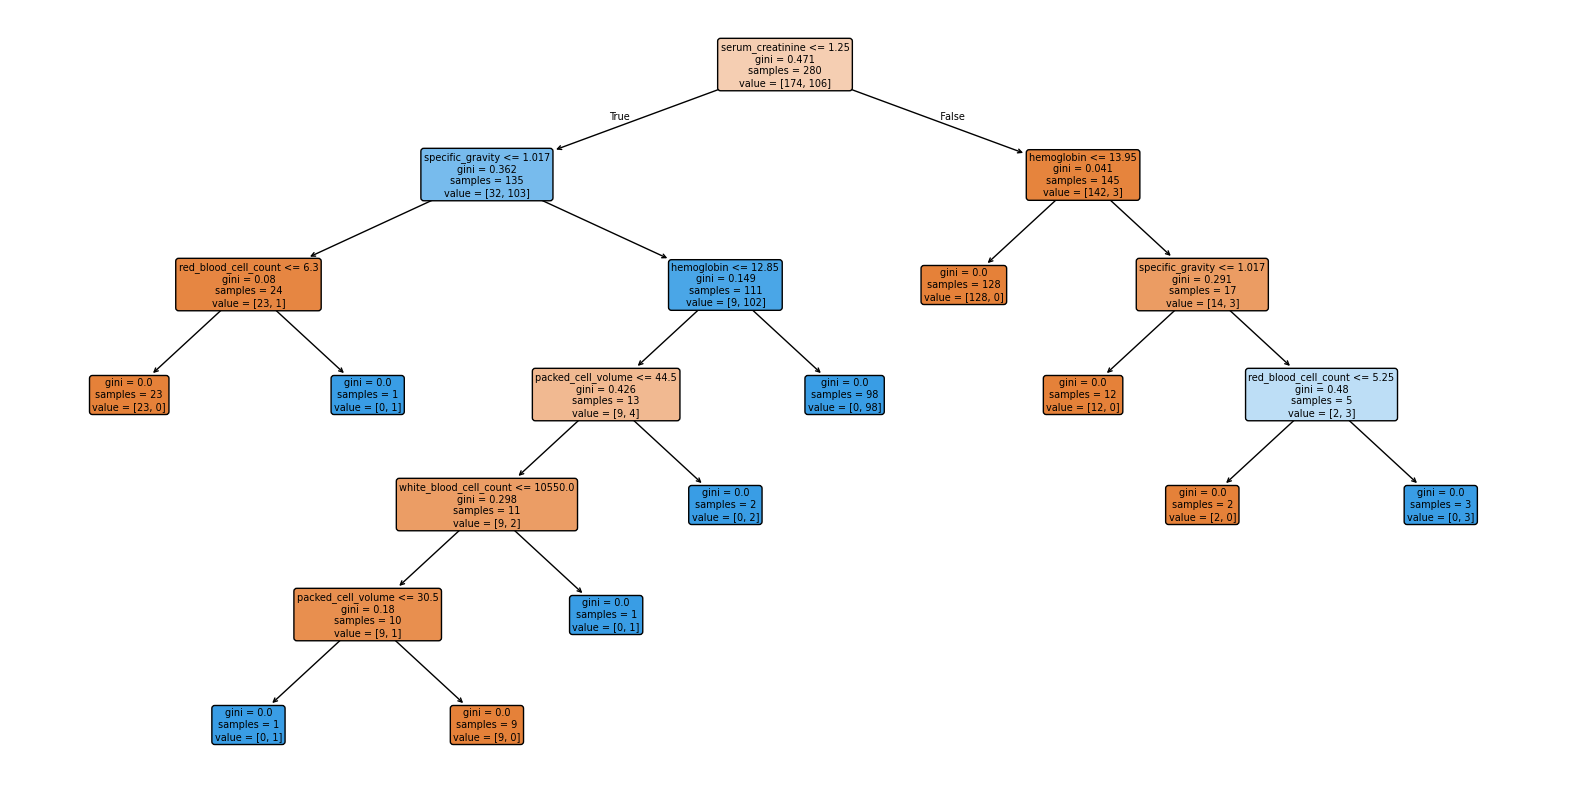

In [22]:
class_names=["ckd","notckd"]
plt.figure(figsize=(20,10))
plot_tree(dtc,feature_names=independent_col,filled=True,rounded=True,fontsize=7)
plt.show

Most important feature: Feature       serum_creatinine
Importance            0.584756
Name: 11, dtype: object


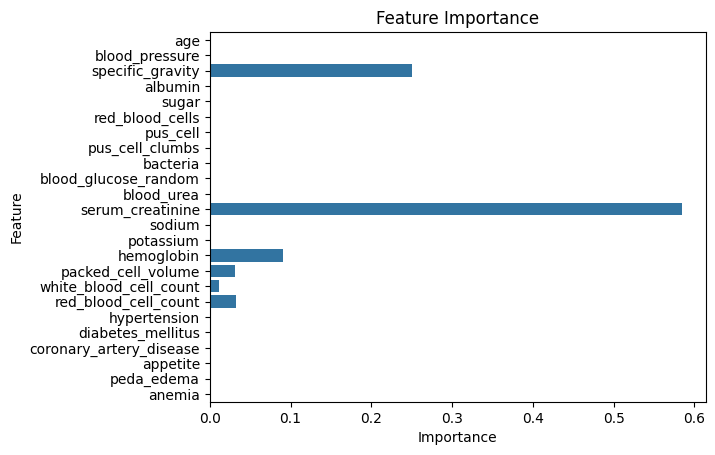

In [28]:
feature_importance=pd.DataFrame({"Feature":independent_col,"Importance":dtc.feature_importances_})
print("Most important feature:",feature_importance.sort_values(by="Importance",ascending=False).iloc[0])
plt.figure()
sns.barplot(x="Importance",y="Feature",data=feature_importance)
plt.title("Feature Importance")
plt.show()